# Ejemplo 03: Sistema de recomendación con K-medias
**_Dr. Antonio Arista Jalife._**

Este es un sistema de recomendación: los sistemas de recomendación estan en todos lados (netflix, amazon, etc), y vamos a crear uno basado en K-medias. Para ello, vamos empezando por cargar un dataset de películas en formato CSV, que puse en este repositorio

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
df_peliculas = pd.read_csv('dataset_peliculas.csv')
df_peliculas

,Nombre,cantidad de accion,cantidad de romance,tipo
0,Robocop,0.90,0.00,accion
1,Terminator,0.88,0.10,accion
2,Dia de la independencia,0.90,0.11,accion
3,Mision Imposible,0.90,0.11,accion
4,Bourne,0.90,0.20,accion
5,Rambo,1.00,0.00,accion
6,Rocky,0.95,0.40,accion
7,Leopold y Kate,0.10,1.00,romance
8,Diario de una pasión,0.10,0.90,romance
9,Operación Dragon,0.75,0.00,accion


### Transformando en datasets de entrenamiento y prueba.
Ahora, vamos a tomar las columnas "cantidad de accion" y "cantidad de romance", y vamos a transformarlas en nuestras variables a clasificar por K-medias. Como aqui tengo acción y romance, hay que mappear "accion" a 0, y "romance" a 1, para hacer un dataset de entrenamiento y prueba.

In [3]:
x = df_peliculas[['cantidad de accion', 'cantidad de romance']].to_numpy()
y = df_peliculas['tipo'].map({
    'accion':0,
    'romance':1
}).to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [4]:
x_train

array([[0.1 , 0.9 ],
       [0.9 , 0.  ],
       [0.9 , 0.2 ],
       [0.1 , 0.9 ],
       [0.9 , 0.2 ],
       [0.75, 0.  ],
       [0.1 , 0.9 ],
       [1.  , 0.  ],
       [0.1 , 0.85],
       [0.95, 0.4 ],
       [0.9 , 0.11],
       [0.  , 0.99],
       [0.1 , 1.  ]])

In [5]:
y_train

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

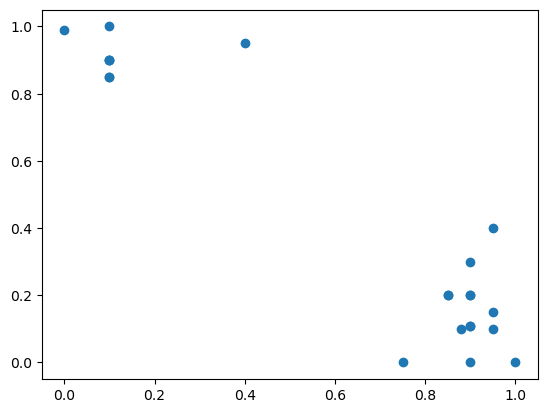

In [7]:
plt.scatter(df_peliculas['cantidad de accion'], df_peliculas["cantidad de romance"])
plt.show()

#### Centroides.
Una vez mappeado, vamos a entrenar el algoritmo de K-medias de forma automática, y extraigamos los centroides obtenidos.

In [8]:
modelo_kmeans = KMeans(n_clusters = 2).fit(x_train)
centroides = modelo_kmeans.cluster_centers_
print(centroides)

c:\Users\alonso.sandoval\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\alonso.sandoval\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[0.9        0.13      ]
 [0.08333333 0.92333333]]


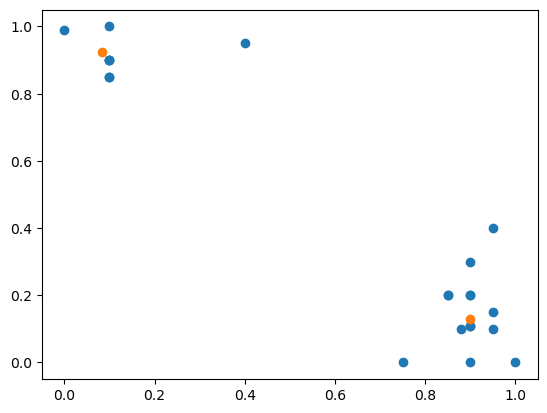

In [9]:
plt.scatter(df_peliculas['cantidad de accion'], df_peliculas["cantidad de romance"])
plt.scatter(centroides[:,0], centroides[:,1], marker = 'o')
plt.show()

### Sistema de recomendación.
Muy bien! ya tenemos los datos, centroides, y estamos listos para crear un sistema que nos recomiende películas. Para ello usaremos la librería MLUtilites que hemos estado construyendo en esta sesión.

In [10]:
import MLUtilities as utils

Esta función va a recibir la lista de todas las peliculas (solo el texto), los datos de todas las películas (igual que como sacamos X), la pelicula ejemplo (Los valores de cantidad de acción y cantidad de romance), y los centroides de Kmeans.

In [11]:
def recomiendamePeliculas(listaDePeliculas,datosPeliculas,peliculaEjemplo,centroides):
    #Vamos a buscar el centroide mas cercano (con MLUtilities ;) )
    clasificacionDeseada = utils.centroideCercano(peliculaEjemplo, centroides)
    
    #Luego, vamos a clasificar todas las peliculas por centroides.
    clasificaciones = utils.clasificarPorCentroides(datosPeliculas, centroides)
    
    #Finalmente, sacaremos los indices que hacen match entre clasificaciones.
    indices = np.where(clasificaciones == clasificacionDeseada)[0]
    
    #Y regresamos la lista de peliculas.
    return listaDePeliculas[indices]

#### Recomiendame una película!
Elige un índice del dataframe (por decir algo... 5), y extrae la película que elegiste. Luego extrae sus características, y pide las recomendaciones!

In [12]:
#Sientete libre de cambiar este valor.
indice_df = 5

#Extrae la película que deseas del dataframe.
peliculaElegida = df_peliculas.iloc[indice_df]

#Obten las características de la pelicula que elegiste.
caracteristicaPelicula = peliculaElegida[['cantidad de accion', 'cantidad de romance']].to_numpy()

#Obten la lista de recomendaciones
recomendaciones = recomiendamePeliculas(df_peliculas['Nombre'],x, caracteristicaPelicula, centroides)

#E imprime lo que hallaste!
print("Porque viste "+peliculaElegida['Nombre']+" ...")
print(recomendaciones)

Porque viste Rambo ...
0                     Robocop
1                  Terminator
2     Dia de la independencia
3            Mision Imposible
4                      Bourne
5                       Rambo
6                       Rocky
9            Operación Dragon
10          Tiempos Violentos
11                     Django
14       Bastardos sin gloria
15            Sherlock Holmes
16                 James bond
17          El último samurai
Name: Nombre, dtype: object


In [13]:
df_peliculas

,Nombre,cantidad de accion,cantidad de romance,tipo
0,Robocop,0.90,0.00,accion
1,Terminator,0.88,0.10,accion
2,Dia de la independencia,0.90,0.11,accion
3,Mision Imposible,0.90,0.11,accion
4,Bourne,0.90,0.20,accion
5,Rambo,1.00,0.00,accion
6,Rocky,0.95,0.40,accion
7,Leopold y Kate,0.10,1.00,romance
8,Diario de una pasión,0.10,0.90,romance
9,Operación Dragon,0.75,0.00,accion


In [15]:
!pip install kneed

In [24]:
!pip install kneefinder

In [29]:
from kneed import KneeLocator
from kneefinder import KneeFinder
from sklearn.metrics import silhouette_score

In [39]:
k_values = range(2, 11)
silhouette_scores = []

# Calculating silhouette score for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_peliculas[['cantidad de accion', 'cantidad de romance']])
    silhouette_scores.append(silhouette_score(df_peliculas[['cantidad de accion', 'cantidad de romance']], cluster_labels))

# Finding the knee with Kneed!
knee = KneeLocator(k_values, silhouette_scores, curve='convex', direction='decreasing')
print("Knee Point:", knee.knee)

c:\Users\alonso.sandoval\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\alonso.sandoval\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\alonso.sandoval\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\alonso.sandoval\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

Knee Point: 4


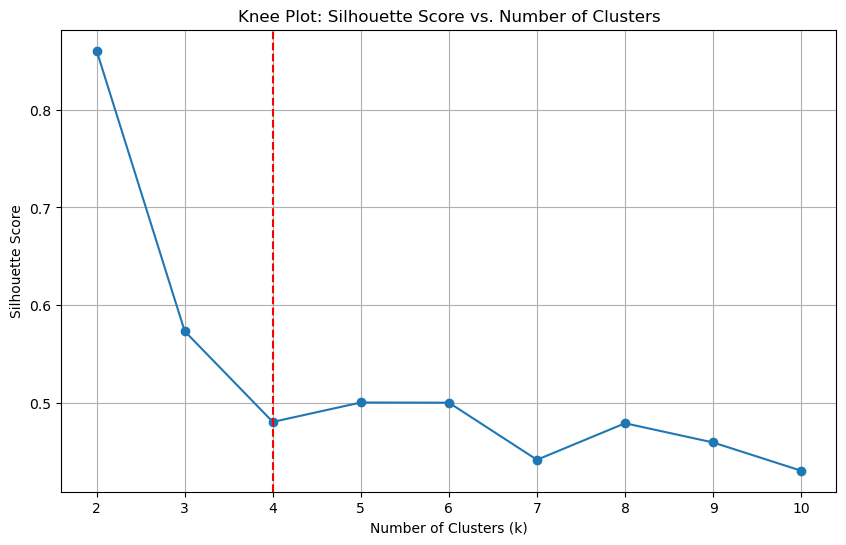

In [40]:
plt.figure(figsize=(10,6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Knee Plot: Silhouette Score vs. Number of Clusters')
plt.axvline(knee.knee, color="r", linestyle="--")
plt.grid(True)
plt.show()

In [41]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_peliculas[['cantidad de accion', 'cantidad de romance']])
centroides = kmeans.cluster_centers_

c:\Users\alonso.sandoval\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\alonso.sandoval\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


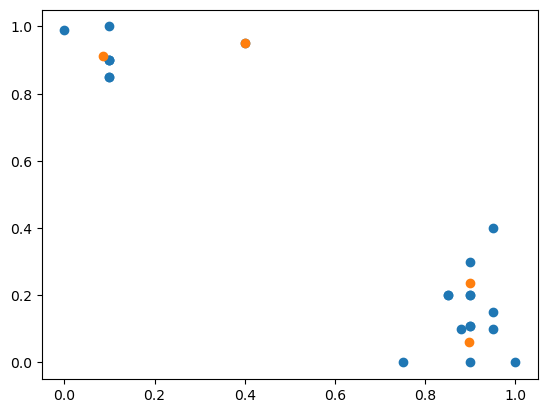

In [42]:
plt.scatter(df_peliculas['cantidad de accion'], df_peliculas["cantidad de romance"])
plt.scatter(centroides[:,0], centroides[:,1], marker = 'o')
plt.show()